In [1]:
import numpy, math
import matplotlib.pyplot as mpl

In [2]:
def recalculateClusters(data, clusters):
    k1_X_Total = 0.0
    k1_Y_Total = 0.0
    k1_number_of_points = 0

    k2_X_Total = 0.0
    k2_Y_Total = 0.0
    k2_number_of_points = 0

    k3_X_Total = 0.0
    k3_Y_Total = 0.0
    k3_number_of_points = 0

    k4_X_Total = 0.0
    k4_Y_Total = 0.0
    k4_number_of_points = 0
    
    k5_X_Total = 0.0
    k5_Y_Total = 0.0
    k5_number_of_points = 0
    
    for point in data:
    
        if point['clusterGroup'] == 'k1':
            k1_X_Total += point['x']
            k1_Y_Total += point['y']
            k1_number_of_points += 1
        if point['clusterGroup'] == 'k2':
            k2_X_Total += point['x']
            k2_Y_Total += point['y']
            k2_number_of_points += 1
        if point['clusterGroup'] == 'k3':
            k3_X_Total += point['x']
            k3_Y_Total += point['y']
            k3_number_of_points += 1
        if point['clusterGroup'] == 'k4':
            k4_X_Total += point['x']
            k4_Y_Total += point['y']
            k4_number_of_points += 1
        if point['clusterGroup'] == 'k5':
            k5_X_Total += point['x']
            k5_Y_Total += point['y']
            k5_number_of_points += 1

    clusters[0][0] = k1_X_Total/k1_number_of_points
    clusters[0][1] = k1_Y_Total/k1_number_of_points

    clusters[1][0] = k2_X_Total/k2_number_of_points
    clusters[1][1] = k2_Y_Total/k2_number_of_points 

    clusters[2][0] = k3_X_Total/k3_number_of_points
    clusters[2][1] = k3_Y_Total/k3_number_of_points 
    
    clusters[3][0] = k4_X_Total/k4_number_of_points
    clusters[3][1] = k4_Y_Total/k4_number_of_points
    
    clusters[4][0] = k5_X_Total/k5_number_of_points
    clusters[4][1] = k5_Y_Total/k5_number_of_points
    
    return clusters

In [3]:
def reassignPoints(data, clusters):
    for point in data:
        distanceFromK1 = math.sqrt((clusters[0][0]-point['x'])*(clusters[0][0]-point['x']) +
                                   (clusters[0][1]-point['y'])*(clusters[0][1]-point['y']))
        
        distanceFromK2 = math.sqrt((clusters[1][0]-point['x'])*(clusters[1][0]-point['x']) +
                                   (clusters[1][1]-point['y'])*(clusters[1][1]-point['y']))
        
        distanceFromK3 = math.sqrt((clusters[2][0]-point['x'])*(clusters[2][0]-point['x']) +
                                   (clusters[2][1]-point['y'])*(clusters[2][1]-point['y']))
        
        distanceFromK4 = math.sqrt((clusters[3][0]-point['x'])*(clusters[3][0]-point['x']) +
                                   (clusters[3][1]-point['y'])*(clusters[3][1]-point['y']))
        
        distanceFromK5 = math.sqrt((clusters[4][0]-point['x'])*(clusters[4][0]-point['x']) +
                                   (clusters[4][1]-point['y'])*(clusters[4][1]-point['y']))


        shortestDistance = distanceFromK1
        clusterGroup = 'k1'

        if distanceFromK2 < shortestDistance:
            shortestDistance = distanceFromK2
            clusterGroup = 'k2'

        if distanceFromK3 < shortestDistance:
            shortestDistance = distanceFromK3
            clusterGroup = 'k3'
        
        if distanceFromK4 < shortestDistance:
            shortestDistance = distanceFromK4
            clusterGroup = 'k4'
            
        if distanceFromK5 < shortestDistance:
            shortestDistance = distanceFromK4
            clusterGroup = 'k5'
            
        point['clusterGroup'] = clusterGroup
        print(point['clusterGroup'])
            
    return data

In [4]:
def calculateError(data,clusters):
    totalDistance = 0.0
    for point in data:
        if point['clusterGroup'] == 'k1':
            totalDistance += math.sqrt((clusters[0][0]-point['x'])*(clusters[0][0]-point['x']) +
                                       (clusters[0][1]-point['y'])*(clusters[0][1]-point['y']))
        if point['clusterGroup'] == 'k2':
            totalDistance += math.sqrt((clusters[1][0]-point['x'])*(clusters[1][0]-point['x']) +
                                       (clusters[1][1]-point['y'])*(clusters[1][1]-point['y']))
        if point['clusterGroup'] == 'k3':
            totalDistance += math.sqrt((clusters[2][0]-point['x'])*(clusters[2][0]-point['x']) +
                               (clusters[2][1]-point['y'])*(clusters[2][1]-point['y']))
        if point['clusterGroup'] == 'k4':
            totalDistance += math.sqrt((clusters[3][0]-point['x'])*(clusters[3][0]-point['x']) +
                               (clusters[3][1]-point['y'])*(clusters[3][1]-point['y']))
        if point['clusterGroup'] == 'k5':
            totalDistance += math.sqrt((clusters[4][0]-point['x'])*(clusters[4][0]-point['x']) +
                               (clusters[4][1]-point['y'])*(clusters[4][1]-point['y']))
    return totalDistance

In [5]:
with open('hw3.dat') as f:
    initialData = []
    for line in f:
        temp = line.split()
        temp[0] = float(temp[0])
        temp[1] = float(temp[1])
        initialData.append(temp)

## initial clusters


In [6]:
k1 = initialData[0]
k2 = initialData[1]
k3 = initialData[2]
k4 = initialData[3]
k5 = initialData[4]

clusters = [k1,k2,k3,k4,k5]

Initial Conditions
Cluster 1 center: [-0.6874701324205895, 0.27347941788934566]
Cluster 2 center: [7.89362608325696, 0.3319104175004391]
Cluster 3 center: [12.876636436585398, -0.1696050822497542]
Cluster 4 center: [11.630876755850315, -0.24985134192854844]
Cluster 5 center: [-2.2257510073536046, 1.5296421054741434]


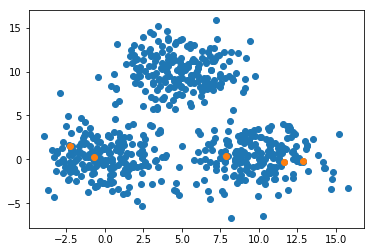

In [7]:
print('Initial Conditions')
mpl.scatter(numpy.array(initialData)[:,0],numpy.array(initialData)[:,1])
mpl.scatter(numpy.array(clusters)[:,0],numpy.array(clusters)[:,1])
i = 0
for cluster in clusters:
    i += 1
    print('Cluster ' + str(i) + ' center: ' + str(cluster))

In [8]:
data = []
#cluster =

for point in initialData:
    
    tempData = dict()
    
    distanceFromK1 = math.sqrt((k1[0]-point[0])*(k1[0]-point[0]) + (k1[1]-point[1])*(k1[1]-point[1]))
    distanceFromK2 = math.sqrt((k2[0]-point[0])*(k2[0]-point[0]) + (k2[1]-point[1])*(k2[1]-point[1]))
    distanceFromK3 = math.sqrt((k3[0]-point[0])*(k3[0]-point[0]) + (k3[1]-point[1])*(k3[1]-point[1]))
    distanceFromK4 = math.sqrt((k4[0]-point[0])*(k4[0]-point[0]) + (k4[1]-point[1])*(k4[1]-point[1]))
    distanceFromK5 = math.sqrt((k5[0]-point[0])*(k5[0]-point[0]) + (k5[1]-point[1])*(k5[1]-point[1]))
    
    shortestDistance = distanceFromK1
    clusterGroup = 'k1'
    
    if distanceFromK2 < shortestDistance:
        shortestDistance = distanceFromK2
        clusterGroup = 'k2'
        
    if distanceFromK3 < shortestDistance:
        shortestDistance = distanceFromK3
        clusterGroup = 'k3'
    
    if distanceFromK4 < shortestDistance:
        shortestDistance = distanceFromK4
        clusterGroup = 'k4'
    
    if distanceFromK5 < shortestDistance:
        shortestDistance = distanceFromK5
        clusterGroup = 'k5'
        
    tempData['x']= point[0]
    tempData['y']= point[1]
    tempData['clusterGroup'] = clusterGroup
    
    data.append(tempData)

One Iteration
Cluster 1 center: [-0.6874701324205895, 0.27347941788934566]
Cluster 2 center: [7.89362608325696, 0.3319104175004391]
Cluster 3 center: [12.876636436585398, -0.1696050822497542]
Cluster 4 center: [11.630876755850315, -0.24985134192854844]
Cluster 5 center: [-2.2257510073536046, 1.5296421054741434]
Total distance from cluster centers: 2877.9871770693153


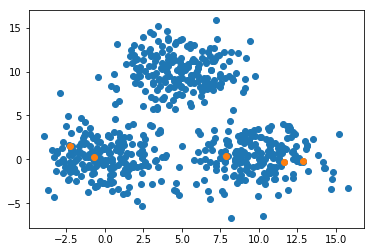

In [9]:
print('One Iteration')
mpl.scatter(numpy.array(initialData)[:,0],numpy.array(initialData)[:,1])
mpl.scatter(numpy.array(clusters)[:,0],numpy.array(clusters)[:,1])
i = 0
for cluster in clusters:
    i += 1
    print('Cluster ' + str(i) + ' center: ' + str(cluster))
print('Total distance from cluster centers: ' + str(calculateError(data,clusters)))

In [10]:
clusters = recalculateClusters(data, clusters)
data = reassignPoints(data, clusters)

k1
k4
k3
k4
k1
k5
k4
k4
k1
k4
k1
k4
k1
k4
k5
k4
k1
k4
k5
k1
k4
k5
k4
k5
k1
k4
k5
k2
k1
k2
k1
k1
k1
k5
k2
k1
k1
k4
k2
k4
k5
k1
k5
k4
k5
k4
k3
k4
k5
k1
k2
k1
k1
k3
k4
k4
k2
k1
k4
k5
k4
k1
k5
k4
k4
k4
k1
k4
k2
k5
k4
k1
k2
k1
k1
k1
k4
k1
k4
k4
k1
k5
k1
k5
k5
k1
k2
k5
k5
k1
k1
k2
k1
k5
k4
k4
k2
k4
k1
k3
k5
k4
k3
k1
k2
k1
k5
k2
k2
k5
k1
k1
k3
k4
k5
k1
k1
k2
k5
k5
k2
k1
k2
k2
k5
k1
k1
k1
k4
k1
k5
k2
k4
k1
k4
k4
k1
k4
k1
k3
k5
k1
k5
k4
k2
k4
k4
k3
k5
k4
k5
k4
k1
k4
k1
k1
k4
k4
k2
k1
k4
k3
k5
k3
k1
k4
k5
k2
k1
k5
k4
k5
k1
k1
k5
k2
k2
k1
k2
k2
k1
k1
k4
k5
k5
k4
k5
k1
k5
k2
k1
k2
k5
k2
k5
k4
k1
k1
k1
k5
k1
k1
k4
k1
k5
k4
k1
k2
k2
k4
k1
k2
k4
k1
k4
k1
k4
k4
k3
k1
k1
k3
k3
k5
k5
k4
k2
k1
k4
k1
k1
k4
k4
k4
k5
k1
k5
k2
k1
k5
k2
k1
k3
k1
k2
k5
k1
k1
k2
k4
k1
k4
k2
k1
k4
k5
k3
k2
k1
k5
k4
k1
k2
k1
k2
k1
k1
k2
k1
k5
k4
k4
k3
k4
k1
k4
k3
k1
k2
k1
k1
k4
k4
k1
k5
k4
k1
k1
k2
k4
k2
k2
k2
k1
k1
k1
k1
k2
k4
k5
k5
k5
k2
k5
k2
k1
k5
k4
k5
k4
k1
k3
k3
k3
k1
k5
k5
k4
k1
k1
k1
k1
k2
k2
k2
k5
k5
k5
k3
k3
k2
k1
k1
k

Two Iterations
Cluster 1 center: [0.4805267008512812, -0.16122634184110313]
Cluster 2 center: [6.845161204527589, 5.546202743887637]
Cluster 3 center: [13.391160254496642, 0.23759755447326164]
Cluster 4 center: [10.896736709859784, 0.03590104739817125]
Cluster 5 center: [0.8410655970135262, 7.325699030790407]
Total distance from cluster centers: 1872.921773784718


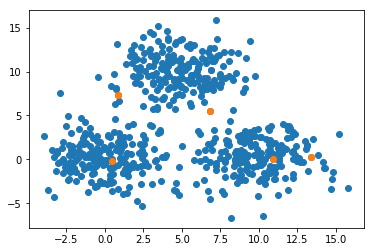

In [11]:
print('Two Iterations')
mpl.scatter(numpy.array(initialData)[:,0],numpy.array(initialData)[:,1])
mpl.scatter(numpy.array(clusters)[:,0],numpy.array(clusters)[:,1])
i = 0
for cluster in clusters:
    i += 1
    print('Cluster ' + str(i) + ' center: ' + str(cluster))
print('Total distance from cluster centers: ' + str(calculateError(data,clusters)))

In [12]:
clusters = recalculateClusters(data, clusters)
data = reassignPoints(data, clusters)

k1
k4
k3
k3
k1
k5
k4
k3
k1
k4
k1
k4
k1
k3
k1
k4
k1
k3
k5
k1
k4
k5
k4
k5
k1
k4
k5
k2
k1
k4
k1
k1
k1
k5
k2
k1
k1
k4
k4
k4
k1
k1
k5
k4
k5
k4
k3
k4
k5
k1
k2
k1
k1
k3
k4
k4
k1
k1
k4
k5
k4
k1
k5
k4
k4
k4
k1
k4
k2
k5
k4
k1
k2
k1
k1
k1
k4
k1
k4
k4
k1
k5
k1
k5
k5
k1
k2
k5
k5
k1
k1
k2
k1
k5
k4
k4
k2
k4
k1
k3
k5
k4
k3
k1
k2
k1
k5
k2
k2
k5
k1
k1
k3
k4
k5
k1
k1
k5
k5
k5
k2
k1
k2
k2
k5
k1
k1
k1
k3
k1
k1
k2
k4
k1
k4
k4
k1
k4
k1
k3
k5
k1
k5
k3
k4
k4
k4
k3
k5
k4
k5
k3
k1
k4
k1
k1
k4
k4
k2
k1
k4
k3
k2
k3
k1
k4
k5
k2
k1
k5
k4
k5
k1
k1
k5
k2
k2
k1
k2
k4
k1
k1
k3
k5
k5
k4
k5
k1
k1
k2
k1
k2
k5
k2
k5
k4
k1
k1
k1
k5
k1
k1
k3
k1
k5
k4
k1
k2
k4
k3
k1
k2
k4
k1
k4
k1
k4
k4
k3
k1
k4
k3
k3
k5
k2
k3
k2
k1
k4
k1
k1
k4
k4
k4
k5
k1
k5
k2
k1
k5
k1
k1
k3
k1
k2
k5
k1
k1
k5
k4
k1
k4
k2
k1
k4
k5
k3
k2
k1
k1
k3
k1
k2
k1
k2
k1
k1
k2
k1
k5
k4
k4
k3
k4
k1
k4
k3
k1
k2
k1
k1
k4
k4
k1
k5
k4
k1
k1
k2
k4
k4
k2
k4
k1
k1
k1
k1
k2
k4
k5
k5
k5
k2
k5
k2
k1
k5
k4
k1
k4
k1
k3
k3
k3
k1
k5
k5
k4
k1
k1
k1
k1
k2
k2
k2
k5
k5
k5
k3
k3
k2
k1
k1
k

Three Iterations
Cluster 1 center: [0.05559950806543658, -0.14534352515109936]
Cluster 2 center: [6.559920535944159, 8.466446646573516]
Cluster 3 center: [13.177942976746149, 0.5524820668035514]
Cluster 4 center: [9.492083998560025, -0.099853003272689]
Cluster 5 center: [2.939480609134319, 10.01507324745321]
Total distance from cluster centers: 1396.8481047742139


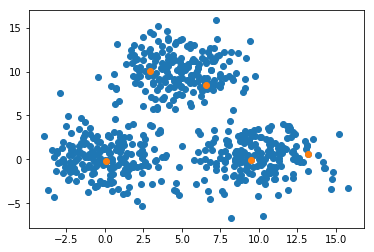

In [13]:
print('Three Iterations')
mpl.scatter(numpy.array(initialData)[:,0],numpy.array(initialData)[:,1])
mpl.scatter(numpy.array(clusters)[:,0],numpy.array(clusters)[:,1])
i = 0
for cluster in clusters:
    i += 1
    print('Cluster ' + str(i) + ' center: ' + str(cluster))
print('Total distance from cluster centers: ' + str(calculateError(data,clusters)))

In [14]:
clusters = recalculateClusters(data, clusters)
data = reassignPoints(data, clusters)

k1
k4
k3
k3
k1
k5
k4
k3
k1
k4
k1
k4
k4
k3
k1
k4
k1
k3
k5
k1
k4
k5
k4
k5
k1
k3
k5
k2
k1
k4
k1
k1
k1
k5
k2
k1
k1
k4
k4
k3
k1
k1
k2
k4
k5
k4
k3
k4
k5
k1
k2
k1
k1
k3
k3
k4
k1
k1
k4
k5
k4
k1
k5
k4
k4
k4
k1
k4
k2
k5
k4
k1
k2
k1
k1
k1
k4
k1
k4
k4
k1
k5
k1
k5
k5
k4
k2
k5
k5
k1
k1
k2
k1
k5
k3
k4
k2
k4
k1
k3
k5
k4
k3
k1
k2
k1
k5
k2
k2
k5
k1
k1
k3
k3
k5
k1
k1
k2
k5
k5
k2
k1
k2
k2
k5
k1
k1
k1
k3
k1
k1
k2
k4
k1
k4
k4
k1
k4
k1
k3
k5
k1
k5
k3
k4
k4
k4
k3
k5
k4
k5
k3
k1
k4
k1
k1
k4
k3
k2
k1
k4
k3
k2
k3
k1
k3
k5
k2
k1
k5
k4
k5
k1
k1
k5
k2
k2
k1
k2
k4
k1
k1
k3
k5
k5
k4
k5
k1
k1
k2
k1
k2
k5
k2
k5
k4
k1
k1
k1
k5
k1
k1
k3
k1
k2
k4
k1
k2
k4
k3
k1
k2
k4
k1
k4
k1
k4
k4
k3
k1
k4
k3
k3
k5
k2
k3
k2
k1
k4
k1
k1
k4
k4
k4
k5
k1
k5
k2
k1
k2
k1
k1
k3
k1
k2
k5
k1
k1
k2
k4
k1
k4
k2
k1
k4
k5
k3
k2
k1
k1
k3
k1
k4
k1
k2
k1
k1
k2
k1
k5
k4
k4
k3
k4
k1
k4
k3
k1
k2
k1
k1
k3
k4
k1
k5
k3
k1
k1
k2
k4
k4
k2
k4
k1
k1
k1
k1
k2
k4
k5
k5
k5
k2
k5
k2
k1
k5
k3
k1
k4
k1
k3
k3
k3
k1
k5
k5
k3
k1
k1
k1
k1
k2
k2
k2
k5
k5
k5
k3
k3
k2
k1
k1
k

Four Iterations
Cluster 1 center: [0.06910233816994965, 0.1259470068775434]
Cluster 2 center: [6.464680782216588, 9.355789376514135]
Cluster 3 center: [12.661300841975416, 0.8626685824357991]
Cluster 4 center: [9.012072932154846, -0.03522581543029833]
Cluster 5 center: [3.235571764148835, 10.685976619688375]
Total distance from cluster centers: 1350.9167185004503


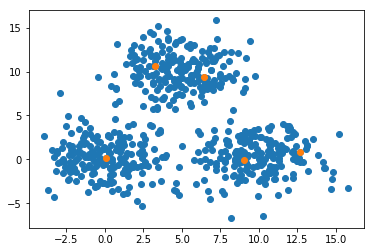

In [15]:
print('Four Iterations')
mpl.scatter(numpy.array(initialData)[:,0],numpy.array(initialData)[:,1])
mpl.scatter(numpy.array(clusters)[:,0],numpy.array(clusters)[:,1])
i = 0
for cluster in clusters:
    i += 1
    print('Cluster ' + str(i) + ' center: ' + str(cluster))
print('Total distance from cluster centers: ' + str(calculateError(data,clusters)))

In [16]:
clusters = recalculateClusters(data, clusters)
data = reassignPoints(data, clusters)

k1
k4
k3
k3
k1
k5
k4
k3
k1
k4
k1
k4
k4
k3
k1
k4
k1
k3
k5
k1
k4
k2
k4
k5
k1
k3
k5
k2
k1
k4
k1
k1
k1
k5
k2
k1
k1
k4
k4
k3
k1
k1
k2
k4
k5
k4
k3
k4
k5
k1
k2
k1
k1
k3
k3
k4
k1
k1
k4
k5
k4
k1
k5
k4
k4
k4
k1
k4
k2
k5
k4
k1
k2
k1
k1
k1
k4
k1
k4
k3
k1
k5
k1
k5
k5
k4
k2
k5
k5
k1
k1
k2
k1
k5
k3
k4
k2
k3
k1
k3
k5
k4
k3
k1
k2
k1
k5
k2
k2
k5
k1
k1
k3
k3
k5
k1
k1
k2
k5
k5
k2
k1
k2
k2
k5
k1
k1
k1
k3
k1
k1
k2
k4
k1
k4
k4
k1
k4
k1
k3
k5
k1
k5
k3
k4
k4
k4
k3
k5
k4
k5
k3
k1
k4
k1
k1
k4
k3
k2
k1
k4
k3
k2
k3
k1
k3
k5
k2
k1
k5
k4
k5
k1
k1
k5
k2
k2
k1
k2
k4
k1
k1
k3
k5
k5
k4
k5
k1
k1
k2
k1
k2
k5
k2
k5
k4
k1
k1
k1
k5
k1
k1
k3
k1
k2
k4
k4
k2
k4
k3
k1
k2
k4
k1
k4
k1
k4
k4
k3
k1
k4
k3
k3
k5
k2
k3
k2
k1
k4
k1
k1
k4
k4
k4
k5
k1
k5
k2
k1
k2
k1
k1
k3
k1
k2
k5
k1
k1
k2
k4
k1
k3
k2
k1
k4
k5
k3
k2
k1
k1
k3
k1
k4
k1
k2
k1
k1
k2
k1
k5
k4
k4
k3
k4
k1
k4
k3
k1
k2
k1
k1
k3
k4
k1
k5
k3
k1
k1
k2
k4
k4
k2
k4
k1
k1
k1
k1
k2
k4
k5
k5
k5
k2
k5
k2
k1
k5
k3
k1
k4
k1
k3
k3
k3
k1
k5
k5
k3
k1
k1
k1
k1
k2
k2
k2
k5
k5
k5
k3
k3
k2
k1
k1
k

Five Iterations
Cluster 1 center: [0.023147334303386044, 0.15903246763364715]
Cluster 2 center: [6.277765130375564, 9.314649229426411]
Cluster 3 center: [12.196104550226819, 0.8267863519419112]
Cluster 4 center: [8.678922266779502, -0.14937241039171067]
Cluster 5 center: [3.1556560435860637, 10.894000845772048]
Total distance from cluster centers: 1338.4177489602428


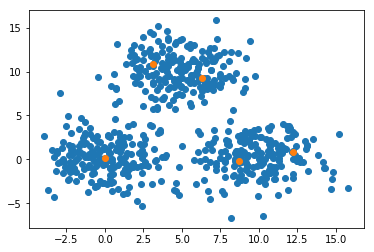

In [17]:
print('Five Iterations')
mpl.scatter(numpy.array(initialData)[:,0],numpy.array(initialData)[:,1])
mpl.scatter(numpy.array(clusters)[:,0],numpy.array(clusters)[:,1])
i = 0
for cluster in clusters:
    i += 1
    print('Cluster ' + str(i) + ' center: ' + str(cluster))
print('Total distance from cluster centers: ' + str(calculateError(data,clusters)))

In [18]:
clusters = recalculateClusters(data, clusters)
data = reassignPoints(data, clusters)

k1
k4
k3
k3
k1
k5
k4
k3
k1
k4
k1
k4
k4
k3
k1
k4
k1
k3
k5
k1
k4
k2
k4
k5
k1
k3
k5
k2
k1
k4
k1
k1
k1
k5
k2
k1
k1
k4
k4
k3
k1
k1
k2
k4
k5
k4
k3
k4
k5
k1
k2
k1
k1
k3
k3
k4
k1
k1
k4
k5
k4
k1
k5
k4
k4
k4
k1
k4
k2
k5
k4
k1
k2
k1
k1
k1
k4
k1
k4
k3
k1
k5
k1
k5
k5
k4
k2
k5
k5
k1
k1
k2
k1
k5
k3
k4
k2
k3
k1
k3
k5
k4
k3
k1
k2
k1
k5
k2
k2
k5
k1
k1
k3
k3
k5
k1
k1
k2
k5
k5
k2
k1
k2
k2
k5
k1
k1
k1
k3
k1
k1
k2
k4
k1
k4
k4
k1
k4
k1
k3
k5
k1
k5
k3
k4
k4
k4
k3
k5
k4
k5
k3
k1
k4
k1
k1
k4
k3
k2
k1
k4
k3
k2
k3
k1
k3
k5
k2
k1
k5
k4
k5
k1
k1
k5
k2
k2
k1
k2
k4
k1
k1
k3
k5
k5
k4
k5
k1
k1
k2
k1
k2
k5
k2
k5
k4
k1
k1
k1
k5
k1
k1
k3
k1
k2
k4
k4
k2
k4
k3
k1
k2
k4
k1
k4
k1
k4
k4
k3
k1
k4
k3
k3
k5
k2
k3
k2
k1
k4
k1
k1
k4
k3
k4
k5
k1
k5
k2
k1
k2
k1
k1
k3
k1
k2
k5
k1
k1
k2
k3
k1
k3
k2
k1
k4
k2
k3
k2
k1
k1
k3
k1
k4
k1
k2
k1
k1
k2
k1
k5
k4
k4
k3
k4
k1
k3
k3
k1
k2
k1
k1
k3
k3
k1
k5
k3
k1
k1
k2
k4
k4
k2
k4
k1
k1
k1
k1
k2
k4
k5
k5
k5
k2
k5
k2
k1
k5
k3
k1
k4
k1
k3
k3
k3
k1
k5
k5
k3
k1
k1
k1
k1
k2
k2
k2
k5
k5
k5
k3
k3
k2
k1
k1
k

Six Iterations
Cluster 1 center: [0.00046867833324161474, 0.1779096525021874]
Cluster 2 center: [6.2326666899279175, 9.290955028665492]
Cluster 3 center: [11.96610339258088, 0.8345221557807194]
Cluster 4 center: [8.50421527044355, -0.2566033515137149]
Cluster 5 center: [3.1410434201261377, 10.954827195930248]
Total distance from cluster centers: 1336.776806545332


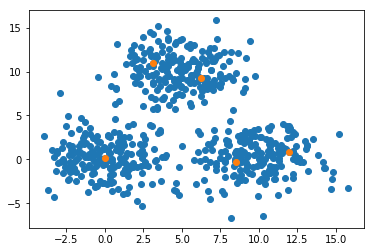

In [19]:
print('Six Iterations')
mpl.scatter(numpy.array(initialData)[:,0],numpy.array(initialData)[:,1])
mpl.scatter(numpy.array(clusters)[:,0],numpy.array(clusters)[:,1])
i = 0
for cluster in clusters:
    i += 1
    print('Cluster ' + str(i) + ' center: ' + str(cluster))
print('Total distance from cluster centers: ' + str(calculateError(data,clusters)))

In [20]:
clusters = recalculateClusters(data, clusters)
data = reassignPoints(data, clusters)

k1
k4
k3
k3
k1
k5
k4
k3
k1
k4
k1
k4
k4
k3
k1
k4
k1
k3
k5
k1
k4
k2
k4
k5
k1
k3
k5
k2
k1
k4
k1
k1
k1
k5
k2
k1
k1
k3
k4
k3
k1
k1
k2
k4
k5
k4
k3
k4
k5
k1
k2
k1
k1
k3
k3
k4
k1
k1
k4
k5
k4
k1
k5
k4
k4
k4
k1
k4
k2
k5
k4
k1
k2
k1
k1
k1
k4
k1
k4
k3
k1
k5
k1
k5
k5
k4
k2
k5
k5
k1
k1
k2
k1
k5
k3
k4
k2
k3
k1
k3
k5
k4
k3
k1
k2
k1
k5
k2
k2
k5
k1
k1
k3
k3
k5
k1
k1
k2
k5
k5
k2
k1
k2
k2
k5
k1
k1
k1
k3
k1
k1
k2
k4
k1
k4
k4
k1
k4
k1
k3
k5
k1
k5
k3
k4
k4
k4
k3
k5
k4
k5
k3
k1
k4
k1
k1
k4
k3
k2
k1
k4
k3
k2
k3
k1
k3
k5
k2
k1
k5
k4
k5
k1
k1
k5
k2
k2
k1
k2
k4
k1
k1
k3
k5
k5
k4
k5
k1
k1
k2
k1
k2
k5
k2
k5
k4
k1
k1
k1
k5
k1
k1
k3
k1
k2
k4
k4
k2
k4
k3
k1
k2
k4
k1
k4
k1
k4
k4
k3
k1
k4
k3
k3
k5
k2
k3
k2
k1
k3
k1
k1
k4
k3
k4
k5
k1
k5
k2
k1
k2
k1
k1
k3
k1
k2
k5
k1
k1
k2
k3
k1
k3
k2
k1
k4
k2
k3
k2
k1
k1
k3
k1
k4
k1
k2
k1
k1
k2
k1
k5
k4
k4
k3
k4
k1
k3
k3
k1
k2
k1
k1
k3
k3
k1
k5
k3
k1
k1
k2
k4
k4
k2
k4
k1
k1
k1
k1
k2
k4
k5
k5
k5
k2
k5
k2
k1
k5
k3
k1
k4
k1
k3
k3
k3
k1
k5
k5
k3
k1
k1
k1
k1
k2
k2
k2
k5
k5
k5
k3
k3
k2
k1
k1
k

Seven Iterations
Cluster 1 center: [0.00046867833324161474, 0.1779096525021874]
Cluster 2 center: [6.220344742422269, 9.301939704505706]
Cluster 3 center: [11.81940584337746, 0.8772325163577206]
Cluster 4 center: [8.430153591783302, -0.3382720555295073]
Cluster 5 center: [3.1222420116133827, 10.95984378195908]
Total distance from cluster centers: 1336.542589040768


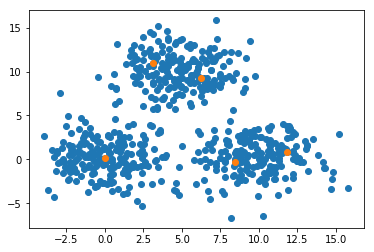

In [21]:
print('Seven Iterations')
mpl.scatter(numpy.array(initialData)[:,0],numpy.array(initialData)[:,1])
mpl.scatter(numpy.array(clusters)[:,0],numpy.array(clusters)[:,1])
i = 0
for cluster in clusters:
    i += 1
    print('Cluster ' + str(i) + ' center: ' + str(cluster))
print('Total distance from cluster centers: ' + str(calculateError(data,clusters)))